In [1]:
import pickle

In [2]:
def load_pickle(fn):
    with open(fn, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
2**24*2**3/2**30

0.125

In [4]:
import pandas as pd

In [5]:
def convert_pd(data_dict,):
    index = pd.MultiIndex.from_tuples([key for key in data_dict.keys() if key!='fn'], names=['Metrics','adder', 'L', 'p'])
    df = pd.DataFrame({'observations': [val for key,val in data_dict.items() if key!='fn']}, index=index)
    return df

# Generate parameters

## Print paramsters

### Bricklayer

In [9]:
import numpy as np
import os
from functools import reduce

In [110]:
def generate_params(nu,de,L_list,seed_list,p_list,filename='params.txt',exist=False,filelist=None,load=False,data_dict=None,fn_dir='auto'):
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{s}.pickle'
    params_text=[]
    if fn_dir=='auto':
        fn_dir=f'bricklayer_{nu}-{de}'
        
    for L in L_list:
        for p in p_list:
            for seed in seed_list:
                    fn=fn_template.format(nu=nu,de=de,L=L,p=p,s=seed)
                        
                    if filelist is None:
                        file_exist = os.path.exists(os.path.join(fn_dir,fn))
                    else:
                        with open(filelist,'r') as f:
                            fn_list=f.read().split('\n')
                        file_exist = fn in fn_list
                        
                    if not file_exist:
                        params_text.append(f'{nu} {de} {L} {p:.2f} {seed}')
                    elif exist:
                        params_text.append(fn)
                        if load:
                            data=load_pickle(os.path.join(fn_dir,fn))
                            add_to_dict(data_dict,data,fn)
    
    if filename is not None:
        with open(filename,'a') as f:
            f.write('\n'.join(params_text)+'\n')

    return params_text

In [ ]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
generate_params(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params.txt',exist=False,filelist=None)

In [ ]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.22,.32,11),np.linspace(.48,.52,5)))
generate_params(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_3.txt',exist=False,filelist=None)

In [ ]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.20,.30,11),np.linspace(.48,.52,5)))
generate_params(nu=2,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_2_3.txt',exist=False,filelist=None)

In [117]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
generate_params(nu=1,de=2,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_2.txt',exist=False,filelist=None)

['1 2 24 0.00 81',
 '1 2 24 0.00 140',
 '1 2 24 0.00 162',
 '1 2 24 0.00 171',
 '1 2 24 0.00 214',
 '1 2 24 0.00 225',
 '1 2 24 0.00 235',
 '1 2 24 0.00 236',
 '1 2 24 0.00 244',
 '1 2 24 0.00 309',
 '1 2 24 0.00 310',
 '1 2 24 0.00 313',
 '1 2 24 0.00 321',
 '1 2 24 0.00 356',
 '1 2 24 0.00 361',
 '1 2 24 0.00 365',
 '1 2 24 0.00 415',
 '1 2 24 0.00 421',
 '1 2 24 0.00 423',
 '1 2 24 0.00 437',
 '1 2 24 0.00 442',
 '1 2 24 0.00 451',
 '1 2 24 0.00 458',
 '1 2 24 0.00 464',
 '1 2 24 0.00 497',
 '1 2 24 0.00 500',
 '1 2 24 0.00 503',
 '1 2 24 0.00 504',
 '1 2 24 0.00 522',
 '1 2 24 0.00 523',
 '1 2 24 0.00 524',
 '1 2 24 0.00 533',
 '1 2 24 0.00 591',
 '1 2 24 0.00 602',
 '1 2 24 0.00 632',
 '1 2 24 0.00 643',
 '1 2 24 0.00 647',
 '1 2 24 0.00 653',
 '1 2 24 0.00 657',
 '1 2 24 0.00 659',
 '1 2 24 0.00 661',
 '1 2 24 0.00 686',
 '1 2 24 0.00 697',
 '1 2 24 0.00 700',
 '1 2 24 0.00 732',
 '1 2 24 0.00 736',
 '1 2 24 0.00 769',
 '1 2 24 0.00 797',
 '1 2 24 0.00 802',
 '1 2 24 0.00 807',
 

### Control transition, w/, w/o feedback

In [84]:
round(0.51,2)-0.51

0.0

In [125]:
def generate_params_CT(xj,p_ctrl_list,p_proj_list,L_list,seed_list,noFB,filename='params_single.txt',exist=False,filelist=None,load=False,data_dict=None,fn_dir='auto',bricklayer=True,dir='.'):
    params_text=[]
    if fn_dir=='auto':
        fn_dir=f'CT_{xj}'.replace('/','-')
        print(fn_dir)
    for L in L_list:
        for p_ctrl in p_ctrl_list:
            for p_proj in p_proj_list:
                for seed in seed_list:
                    if abs(p_ctrl-round(p_ctrl,2))<1e-4:
                        p_ctrl_fmt='{p_ctrl:.2f}'
                    else:
                        p_ctrl_fmt='{p_ctrl:.3f}'
                    
                    if abs(p_proj-round(p_proj,2))<1e-4:
                        p_proj_fmt='{p_proj:.2f}'
                    else:
                        p_proj_fmt='{p_proj:.3f}'

                    fn_template='CT_pctrl'+p_ctrl_fmt+'_pproj'+p_proj_fmt+'_L{L}_xj({xj})_s{seed}{noFB}.pickle'

                    fn=fn_template.format(p_ctrl=p_ctrl,p_proj=p_proj,L=L,s=seed,xj=xj.replace('/','-'),seed=seed,noFB='_noFB' if noFB else '')
                        
                    if filelist is None:
                        file_exist = os.path.exists(os.path.join(fn_dir,fn))
                    else:
                        with open(os.path.join(dir,filelist),'r') as f:
                            fn_list=f.read().split('\n')
                        file_exist = fn in fn_list
                        
                    if not file_exist:
                        text_string_fmt=p_ctrl_fmt+ ' '+ p_proj_fmt +' {L} {xj} {seed} {noFB}'
                        text_string=(text_string_fmt.format(p_ctrl=p_ctrl,p_proj=p_proj,L=L,xj=xj,seed=seed,noFB="-noFB" if noFB else ""))
                        params_text.append(text_string)
                    elif exist:
                        params_text.append(fn)
                        if load:
                            data=load_pickle(os.path.join(fn_dir,fn),)
                            add_to_dict(data_dict,data,fn,bricklayer=bricklayer)
        
    if filename is not None:
        with open(filename,'a') as f:
            f.write('\n'.join(params_text)+'\n')

    return params_text

In [131]:
np.linspace(0.455,0.5,10)

array([0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495,
       0.5  ])

In [132]:
# p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(np.linspace(.45,.52,8),np.linspace(0.455,0.5,10)))
generate_params_CT('1/3,2/3',p_ctrl_list=p_list,p_proj_list=np.linspace(0,0,1),L_list=[16,20,24],seed_list=range(2000),noFB=True,filename='params_single_2.txt',exist=False,filelist=None,dir='CT_1-3,2-3')

CT_1-3,2-3


['0.455 0.00 16 1/3,2/3 0 -noFB',
 '0.455 0.00 16 1/3,2/3 1 -noFB',
 '0.455 0.00 16 1/3,2/3 2 -noFB',
 '0.455 0.00 16 1/3,2/3 3 -noFB',
 '0.455 0.00 16 1/3,2/3 4 -noFB',
 '0.455 0.00 16 1/3,2/3 5 -noFB',
 '0.455 0.00 16 1/3,2/3 6 -noFB',
 '0.455 0.00 16 1/3,2/3 7 -noFB',
 '0.455 0.00 16 1/3,2/3 8 -noFB',
 '0.455 0.00 16 1/3,2/3 9 -noFB',
 '0.455 0.00 16 1/3,2/3 10 -noFB',
 '0.455 0.00 16 1/3,2/3 11 -noFB',
 '0.455 0.00 16 1/3,2/3 12 -noFB',
 '0.455 0.00 16 1/3,2/3 13 -noFB',
 '0.455 0.00 16 1/3,2/3 14 -noFB',
 '0.455 0.00 16 1/3,2/3 15 -noFB',
 '0.455 0.00 16 1/3,2/3 16 -noFB',
 '0.455 0.00 16 1/3,2/3 17 -noFB',
 '0.455 0.00 16 1/3,2/3 18 -noFB',
 '0.455 0.00 16 1/3,2/3 19 -noFB',
 '0.455 0.00 16 1/3,2/3 20 -noFB',
 '0.455 0.00 16 1/3,2/3 21 -noFB',
 '0.455 0.00 16 1/3,2/3 22 -noFB',
 '0.455 0.00 16 1/3,2/3 23 -noFB',
 '0.455 0.00 16 1/3,2/3 24 -noFB',
 '0.455 0.00 16 1/3,2/3 25 -noFB',
 '0.455 0.00 16 1/3,2/3 26 -noFB',
 '0.455 0.00 16 1/3,2/3 27 -noFB',
 '0.455 0.00 16 1/3,2/3 28 -no

In [111]:
p_list

array([0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52])

## Load data

### Bricklayer

In [79]:
def add_to_dict(data_dict,data,filename,bricklayer=True):
    if filename in data_dict['fn']:
        # print(f'File duplicated: {filename}' )
        pass
    else:
        data_dict['fn'].append(filename)
        if bricklayer:
            adder=(data['args'].nu,data['args'].de)
        else:
            xj=(data['args'].xj,None)
        for key in set(data.keys())-set(['args']):
            if bricklayer:
                params=(key,adder,data['args'].L,data['args'].p)
            else:
                params=(key,xj,data['args'].L,data['args'].p_ctrl,)
            if params in data_dict:
                data_dict[params].append(data[key])
            else:
                data_dict[params]=[data[key]]

In [45]:
data_0_1_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
generate_params(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_0_1_dict)
df_0_1=convert_pd(data_0_1_dict)

In [46]:
df_0_1

,,,,observations
Metrics,adder,L,p,
TMI,"(0, 1)",12,0.00,"[-2.6805789328839875, -2.673656143370288, -2.6..."
EE,"(0, 1)",12,0.00,"[3.657602635811222, 3.652433655550861, 3.65117..."
TMI,"(0, 1)",12,0.03,"[-2.5527722391309147, -2.0623608536252274, -1...."
EE,"(0, 1)",12,0.03,"[3.6027033987340342, 3.3375183700452933, 2.656..."
TMI,"(0, 1)",12,0.06,"[-1.3742478381520042, -0.9499572161889696, -0...."
...,...,...,...,...
EE,"(0, 1)",24,0.54,"[0.02056109699008511, 0.5069641751102318, 0.44..."
TMI,"(0, 1)",24,0.57,"[-5.54140128479947e-15, -7.8439722495105e-09, ..."
EE,"(0, 1)",24,0.57,"[2.551951005937217e-15, 0.32125512398759, 0.23..."


In [47]:
data_1_3_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.22,.32,11),np.linspace(.48,.52,5)))

generate_params(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_1_3_dict)
df_1_3=convert_pd(data_1_3_dict)

In [48]:
df_1_3

,,,,observations
Metrics,adder,L,p,
TMI,"(1, 3)",12,0.00,"[-2.6790125131091127, -2.7015819215303694, -2...."
EE,"(1, 3)",12,0.00,"[3.65132252869602, 3.673265945444025, 3.654857..."
TMI,"(1, 3)",12,0.03,"[-2.6576663788688855, -2.4693847612259425, -1...."
EE,"(1, 3)",12,0.03,"[3.6526456955384043, 3.5453014582593525, 2.819..."
TMI,"(1, 3)",12,0.06,"[-1.7036705460184616, -1.2487625984507358, -0...."
...,...,...,...,...
EE,"(1, 3)",24,0.54,"[0.14664095844577374, 0.8204104472141127, 1.26..."
TMI,"(1, 3)",24,0.57,"[-9.86303017036505e-08, -0.0004094666549760428..."
EE,"(1, 3)",24,0.57,"[0.5038709574301601, 0.6977295047350204, 0.911..."


In [49]:
data_2_3_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.25,.35,11),np.linspace(.48,.52,5)))

generate_params(nu=2,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_2_3_dict)
df_2_3=convert_pd(data_2_3_dict)

In [50]:
df_2_3

,,,,observations
Metrics,adder,L,p,
TMI,"(2, 3)",12,0.00,"[-2.696683996212151, -2.691282974683912, -2.69..."
EE,"(2, 3)",12,0.00,"[3.6619437337489176, 3.658236922334338, 3.6709..."
TMI,"(2, 3)",12,0.03,"[-2.6658873216519248, -2.3569014612804904, -1...."
EE,"(2, 3)",12,0.03,"[3.6391155552379364, 3.4895165362941327, 2.754..."
TMI,"(2, 3)",12,0.06,"[-1.6198656272518255, -1.3684252398851435, -0...."
...,...,...,...,...
EE,"(2, 3)",24,0.54,"[0.10070096344803388, 0.5437549114863615, 0.04..."
TMI,"(2, 3)",24,0.57,"[-6.00908212078366e-15, -0.021448626258458336,..."
EE,"(2, 3)",24,0.57,"[0.11774098696456156, 0.562482153287403, 0.878..."


In [51]:
data_1_2_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))

generate_params(nu=1,de=2,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_1_2_dict)
df_1_2=convert_pd(data_1_2_dict)

In [52]:
df_1_2

,,,,observations
Metrics,adder,L,p,
TMI,"(1, 2)",12,0.00,"[-2.700581041566328, -2.671324296097452, -2.70..."
EE,"(1, 2)",12,0.00,"[3.6638733280611526, 3.649966179896585, 3.6608..."
TMI,"(1, 2)",12,0.03,"[-2.5482857986193377, -2.0749643841899403, -1...."
EE,"(1, 2)",12,0.03,"[3.60362721090703, 3.373668692601586, 2.686910..."
TMI,"(1, 2)",12,0.06,"[-1.3885323987573728, -0.988603037556913, -0.1..."
...,...,...,...,...
EE,"(1, 2)",24,0.54,"[0.5069641751102318, 0.035349740028073985, 1.2..."
TMI,"(1, 2)",24,0.57,"[-3.76504444539922e-15, -3.641325019287933e-10..."
EE,"(1, 2)",24,0.57,"[2.107861796087155e-15, 0.23291076989407983, 0..."


### Control transition, w/, w/o feedback

In [7]:
import numpy as np

In [12]:
data_noFB_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.45,.52,8)))

generate_params_CT(xj='1/3,2/3',p_ctrl_list=p_list,p_proj_list=np.linspace(0,0,1),L_list=[12,16,20,24],seed_list=range(2000),noFB=True,filename=None,exist=True,filelist=None,load=True,data_dict=data_noFB_dict,bricklayer=False)
    
df_noFB=convert_pd(data_noFB_dict,)

CT_1-3,2-3


In [13]:
df_noFB

observations
Metrics adder           L  p                                                      
O       (1/3,2/3, None) 12 0.00  [0.006549321699474367, 0.00010487743055465996,...
TMI     (1/3,2/3, None) 12 0.00  [-2.7085570879135354, -2.7033449813738524, -2....
EE      (1/3,2/3, None) 12 0.00  [3.653139511263078, 3.669226634249259, 3.65457...
O       (1/3,2/3, None) 12 0.03  [-0.004347090595294878, 0.006867181375606481, ...
TMI     (1/3,2/3, None) 12 0.03  [-2.677218545905927, -2.30255529840898, -2.687...
...                                                                            ...
                        24 0.57  [-4.4330095150257876e-11, -4.433121027839577e-...
EE      (1/3,2/3, None) 24 0.57  [1.508520526166744e-11, 1.508653752929699e-11,...
O       (1/3,2/3, None) 24 0.60  [0.3279613849621452, 0.2162604990520363, -0.10...
TMI     (1/3,2/3, None) 24 0.60  [-4.433032209997607e-11, -4.4331871507097276e-...
EE      (1/3,2/3, None) 24 0.60  [1.508698161850684e-11, 1.508564935087729e-11,...

[312 rows x 1 columns]

# Plot

## API

In [17]:
import matplotlib.pyplot as plt
import scipy
from functools import partial

In [18]:
import matplotlib.patches as mpatches

In [19]:
def plot_line(df,ax=None,params={'Metrics':'O','p':0,},L_list=None,yscale=None,ylim=None,method=np.mean,errorbar=False):
    if ax is None:
        fig,ax=plt.subplots()
    assert method in {np.mean,np.var}, f'the method should be either np.mean or np.var. {method} is not currently supported.'
    x_name='p'
    title_name='p'
    op_str={np.mean:r'\overline',np.var:r'Var~'}
    ylabel_name={'O':rf'${op_str[method]}{{\langle O \rangle}}$','EE':rf'${op_str[method]}{{ S_{{L/2}} }}$','TMI':rf'${op_str[method]}{{I_3}}$','SA':rf'${op_str[method]}{{ S_{{anc}} }}$'}
    df=df.xs(params.values(),level=list(params.keys()))
    if L_list is None:
        L_list=np.sort(df.index.get_level_values('L').unique())
    colormap = (plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(L_list.shape[0]))
    for L in sorted(L_list):
        dd=df.xs(key=L,level='L')['observations'].apply(method)
        if errorbar:
            if method is np.mean:
                dd_se=df.xs(key=L,level='L')['observations'].apply(np.std).values/np.sqrt(df.xs(key=L,level='L')['observations'].apply(len).values)
            if method is np.var:
                mu4=df.xs(key=L,level='L')['observations'].apply(partial(scipy.stats.moment,moment=4)).values
                mu2=df.xs(key=L,level='L')['observations'].apply(partial(scipy.stats.moment,moment=2)).values
                n=(df.xs(key=L,level='L')['observations'].apply(len).values)
                dd_se=np.sqrt((mu4-(n-3)/(n-1)*mu2**2)/n)
                
        x=dd.index.get_level_values(x_name)
        arg_sort=x.argsort()
        if yscale == 'log' and params['Metrics']== 'TMI':
            dd_sort=np.abs(dd.values[arg_sort])
            ylabel_name['TMI']=rf'${op_str[method]}{{|I_3|}}$'

        else:
            dd_sort=dd.values[arg_sort]
        if errorbar:
            ax.errorbar(x[arg_sort],dd_sort,yerr=dd_se[arg_sort],label=f'L={L}',lw=1,color=colormap.__next__(),capsize=2)
        else:
            ax.plot(x[arg_sort],dd_sort,'.-',label=f'L={L}',lw=1,color=colormap.__next__())
    ax.legend()
    if ylim is not None:
        ax.set_ylim(ylim)
    if yscale is not None:
        ax.set_yscale(yscale)
    ax.set_ylabel(ylabel_name[params['Metrics']])
    ax.set_xlabel(x_name)
    # ax.set_title(f'{title_name}={params[title_name]:.2f}')

In [20]:
def plot_inset(data,ax,xlim,ylim,ax_inset_pos,L_list,params,yscale,method):
    # .27,.3
    # .6,.63
    axins = ax.inset_axes(ax_inset_pos,transform=ax.transAxes)
    plot_line(data,params=params,ax=axins,L_list=L_list,yscale=yscale,method=method)
    axins.grid('on')
    axins.set_xlim(xlim)
    axins.set_ylim(ylim)
    axins.legend().remove()
    axins.set_ylabel('')
    axins.set_title('')
    axins.set_xlabel('')
    rect=mpatches.Rectangle((xlim[0],ylim[0]),xlim[1]-xlim[0],ylim[1]-ylim[0],ls='dashed',fill=None,lw=0.5,zorder=10)
    ax.add_patch(rect)
    if xlim[0]>=0.6*(ax_inset_pos[0]) and xlim[1]>=0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[1])
        inset_coord_1=(0,1)
        dashed_coord_2=(xlim[1],ylim[0])
        inset_coord_2=(1,0)
    elif xlim[0]>=0.6*(ax_inset_pos[0]) and xlim[1]<0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[1])
        inset_coord_1=(0,1)
        dashed_coord_2=(xlim[1],ylim[1])
        inset_coord_2=(1,1)
    elif xlim[0]<0.6*(ax_inset_pos[0]) and xlim[1]<0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[0])
        inset_coord_1=(0,0)
        dashed_coord_2=(xlim[1],ylim[1])
        inset_coord_2=(1,1)

    line1=mpatches.ConnectionPatch(dashed_coord_1, inset_coord_1, coordsA='data',coordsB='axes fraction',axes=ax,axesB=axins,ls='dashed',lw=0.5)
    ax.add_patch(line1)
    line2=mpatches.ConnectionPatch(dashed_coord_2, inset_coord_2, coordsA='data',coordsB='axes fraction',axes=ax,axesB=axins,ls='dashed',lw=0.5)
    ax.add_patch(line2)


In [21]:
def plot_SA_2(df_anc,L_list,xlim1,xlim2,ylim1,ylim2,ax_inset_pos1,ax_inset_pos2,metrics,p_ctrl=None,inset1=False,inset2=False,yscale=None,filename=None,dirpath='Fig',ylim=None,errorbar=False,method=np.mean):
    fig,ax=plt.subplots(figsize=(6.8,5))
    params={'Metrics':metrics,}
    adder=df_anc.index.get_level_values('adder').unique().tolist()[0]
    plot_line(df_anc,params=params,ax=ax,L_list=L_list,yscale=yscale,ylim=ylim,errorbar=errorbar,method=method)
    ax.grid('on')
    ax.set_xlim(0,0.6)
    if inset1:
        plot_inset(df_anc,ax,xlim=xlim1,ylim=ylim1,ax_inset_pos=ax_inset_pos1,params=params,L_list=L_list,yscale=yscale,method=method)

    if inset2:
        plot_inset(df_anc,ax,xlim=xlim2,ylim=ylim2,ax_inset_pos=ax_inset_pos2,params=params,L_list=L_list,yscale=yscale,method=method)
    

    if filename is not None:
        if filename== 'auto':
            method_name={np.mean:'mean',np.var:'var'}
            filename= f'{metrics}_{method_name[method]}_L({L_list[0]},{L_list[-1]}){"_log" if yscale else ""}_adder({adder[0]}-{adder[1]}).png'
        print(filename)
        # plt.subplots_adjust(left=(.8)/fig.get_size_inches()[0],right=1-(.1)/fig.get_size_inches()[0],bottom=.5/fig.get_size_inches()[1],top=1-.2/fig.get_size_inches()[1])
        # fig.savefig(os.path.join(dirpath,filename),)

## +0

EE_mean_L(12,24)_log_adder(0-1).png


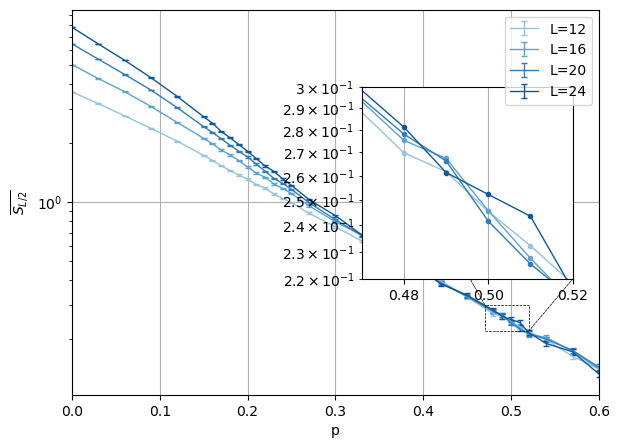

In [53]:
plot_SA_2(df_0_1,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale='log',errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(0-1).png


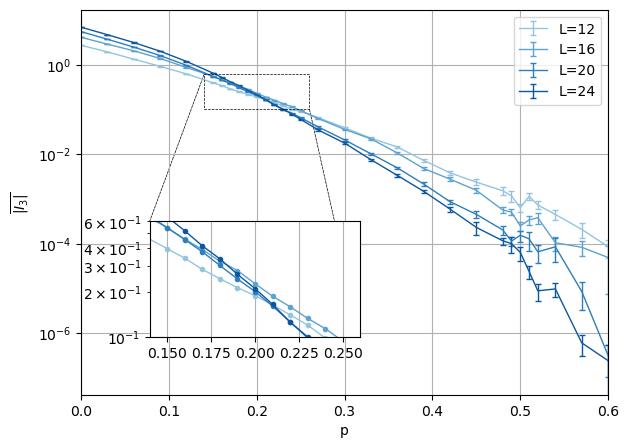

In [54]:
plot_SA_2(df_0_1,L_list=np.arange(12,25,4),inset1=True,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [30]:
import torch

In [27]:
from matplotlib.colors import LogNorm
class Optimizer:
    def __init__(self,p_c,nu,df,params={'Metrics':'O',},p_range=[-0.1,0.1],Lmin=None,Lmax=None,bootstrap=False,gaussian_check=False):
        self.p_c=torch.tensor([p_c],requires_grad=False)
        self.nu=torch.tensor([nu],requires_grad=False)
        self.p_range=p_range
        self.Lmin=0 if Lmin is None else Lmin
        self.Lmax=100 if Lmax is None else Lmax
        self.bootstrap=bootstrap
        self.gaussian_check=gaussian_check
        self.params=params
        self.df=self.load_dataframe(df,params)
        self.L_i,self.p_i,self.d_i,self.y_i = self.load_data()

    
    def load_dataframe(self,df,params):
        df=df.xs(params.values(),level=list(params.keys()))['observations']
        df=df[(df.index.get_level_values('p')<=self.p_c.item()+self.p_range[1]) & (self.p_c.item()+self.p_range[0]<=df.index.get_level_values('p'))]
        df=df[(df.index.get_level_values('L')<=self.Lmax) & (self.Lmin<=df.index.get_level_values('L'))]
        if self.bootstrap:
            df=df.apply(lambda x: list(np.random.choice(x,size=len(x),replace=True)))
        if self.gaussian_check:
            print(df.apply(scipy.stats.shapiro))
        return df
    
    def load_data(self):
        L_i=torch.from_numpy(self.df.index.get_level_values('L').values)
        p_i=torch.from_numpy(self.df.index.get_level_values('p').values)
        d_i=torch.from_numpy(self.df.apply(np.std).values)/np.sqrt(self.df.apply(len).values)
        y_i=torch.from_numpy(self.df.apply(np.mean).values)
        assert p_i.unique().shape[0]>=4, f'not enough data points {p_i.unique().shape[0]}'
        return L_i,p_i,d_i,y_i

    def loss(self,p_c,nu,MLE=True):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        order=x_i.argsort()
        x_i_ordered=x_i[order]
        y_i_ordered=self.y_i[order]
        d_i_ordered=self.d_i[order]
        x={i:x_i_ordered[1+i:x_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        d={i:d_i_ordered[1+i:d_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        y={i:y_i_ordered[1+i:y_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        x_post_ratio=(x[1]-x[0])/(x[1]-x[-1])
        x_pre_ratio=(x[-1]-x[0])/(x[1]-x[-1])
        y_var=d[0]**2+(x_post_ratio*d[-1])**2+(x_pre_ratio*d[1])**2
        y_bar=x_post_ratio*y[-1]-x_pre_ratio*y[1]
        # return torch.sum((y[0]-y_bar)**2/y_var)
        if MLE:
            return self.MLE(y[0],y_bar,y_var)
        else:
            return self.chi2(y[0],y_bar,y_var)
    
    def loss_shift(self,p_c,nu,omega,a,b,c,d,):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        y_var=self.d_i**2
        self.y_i_fitted=a+b*x_i+c*x_i**2+d/self.L_i**omega
        return self.chi2(self.y_i_fitted,self.y_i,y_var)

    def chi2(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)
    
    def MLE(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)+0.5*torch.sum(torch.log(sigma2))

    
    def visualize(self,p_c_range,nu_range,trajectory=False,fig=True,ax=None,mapfunc=lambda x:x):
        p_c_list=np.linspace(*p_c_range,82)
        nu_list=np.linspace(*nu_range,80)
        loss_map=np.array([[self.loss(torch.tensor([p_c]),torch.tensor([nu]),MLE=False).item() for p_c in p_c_list] for nu in nu_list])
        if fig:
            if ax is None:
                fig, ax = plt.subplots()
            cm=ax.contourf(p_c_list,nu_list,mapfunc(loss_map),levels=20)
            ax.set_xlabel(r'$p_c$')
            ax.set_ylabel(r'$\nu$')
            plt.colorbar(cm)
            if trajectory:
                ax.scatter(self.p_c_history,self.nu_history,s=np.linspace(3,1,len(self.p_c_history))**2,)
            ct=ax.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed')
        else:
            ct=plt.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed');
        params_range=ct.collections[0].get_paths()[0].vertices
        return params_range[:,0].min(),params_range[:,0].max(),params_range[:,1].min(),params_range[:,1].max()

    def optimize(self,tolerance=1e-10):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime],)
        # optimizer=torch.optim.Adam([self.p_c,self.nu],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        # self.p_c_history=[self.p_c.item()]
        # self.nu_history=[self.nu.item()]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<10000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss(p_c_transformed, nu_transformed,MLE=False)
            # loss_=self.loss(self.p_c,self.nu)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            # self.p_c_history.append(self.p_c.item())
            # self.nu_history.append(self.nu.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(self.p_c,self.nu)))
        self.se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'loss':current_loss*2/(self.y_i.shape[0]-2),'se':self.se.detach().numpy()}
    def optimize_scipy(self):
        func=lambda x: self.loss(torch.tensor([x[0]]),torch.tensor([x[1]]),MLE=False).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='Nelder-Mead',bounds=[(0,1),(0,2)])
        # res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='L-BFGS-B',bounds=[(0,1),(0,5)])
        # 'L-BFGS-B',bounds=[(0,1),(0,5)]
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(torch.tensor(res.x[0]),torch.tensor(res.x[1]))))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.p_c=torch.tensor([res.x[0]])
        self.nu=torch.tensor([res.x[1]])
        return res,res.fun*2/(self.y_i.shape[0]-2),se

    def optimize_shift(self,omega,a,b,c,d,tolerance=1e-10,):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        omega=torch.tensor([omega],requires_grad=True,dtype=torch.float32)
        a=torch.tensor([a],requires_grad=True,dtype=torch.float32)
        b=torch.tensor([b],requires_grad=True,dtype=torch.float32)
        c=torch.tensor([c],requires_grad=True,dtype=torch.float32)
        d=torch.tensor([d],requires_grad=True,dtype=torch.float32)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime,omega,a,b,c,d],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<100000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss_shift(p_c_transformed, nu_transformed,omega,a,b,c,d)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'omega':omega.item(),'a':a.item(),'b':b.item(),'c':c.item(),'d':d.item(),'loss':current_loss,'chi-square_nu':current_loss*2/(self.y_i.shape[0]-7)}

    def optimize_shift_scipy(self,omega,a,b,c,d):
        func=lambda x: self.loss_shift(*tuple(x)).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item(),omega,a,b,c,d],method='Nelder-Mead')
        Hessian= torch.tensor(torch.autograd.functional.hessian(lambda x: self.loss_shift(*x),torch.tensor(res.x)))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        return res,res.fun*2/(self.y_i.shape[0]-7),se

    def plot_loss(self):
        if hasattr(self, 'loss_history'):
            fig,ax=plt.subplots()
            ax.plot(self.loss_history,'.-')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('O')
    
    def plot_data_collapse(self,ax=None):
        x_i=(self.p_i-self.p_c)*(self.L_i)**(1/self.nu)
        # x_i=self.p_i
        if ax is None:
            fig,ax = plt.subplots()
        L_list=self.df.index.get_level_values('L').unique().sort_values().values
        idx_list=[0]+(np.cumsum([self.df.xs(key=L,level='L').shape[0] for L in L_list])).tolist()
        L_dict={L:(start_idx,end_idx) for L,start_idx,end_idx in zip(L_list,idx_list[:-1],idx_list[1:])}
        for L,(start_idx,end_idx) in L_dict.items():
            ax.scatter(x_i.detach().numpy()[start_idx:end_idx],self.y_i.detach().numpy()[start_idx:end_idx],label=f'{L}')
            # ax.plot(x_i.detach().numpy()[start_idx:end_idx],self.y_i_fitted.detach().numpy()[start_idx:end_idx],label=f'{L}')
        ax.set_xlabel(r'$(p_i-p_c)L^{1/\nu}$')
        ax.set_ylabel(r'$y_i$')
        ax.legend()
        ax.grid('on')
        ax.set_title(rf'$p_c={self.p_c.item():.3f},\nu={self.nu.item():.3f}$')

        adder=self.df.index.get_level_values('adder').unique().tolist()[0]
        print(f'{self.params["Metrics"]}_Scaling_L({L_list[0]},{L_list[-1]})_adder({adder[0]}-{adder[1]}).png')
        
    
    def plot_line(self):
        fig,ax=plt.subplots()
        ax.plot(self.p_i,self.y_i)


In [28]:
optim=Optimizer(p_c=0.2,nu=1.3,df=df_0_1,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

NameError: name 'df_0_1' is not defined

In [93]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 218.3553994772517
              x: [ 1.841e-01  1.369e+00]
            nit: 30
           nfev: 60
  final_simplex: (array([[ 1.841e-01,  1.369e+00],
                        [ 1.841e-01,  1.369e+00],
                        [ 1.841e-01,  1.369e+00]]), array([ 2.184e+02,  2.184e+02,  2.184e+02])),
 10.917769973862585,
 tensor([0.0010, 0.0362], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(0-1).png


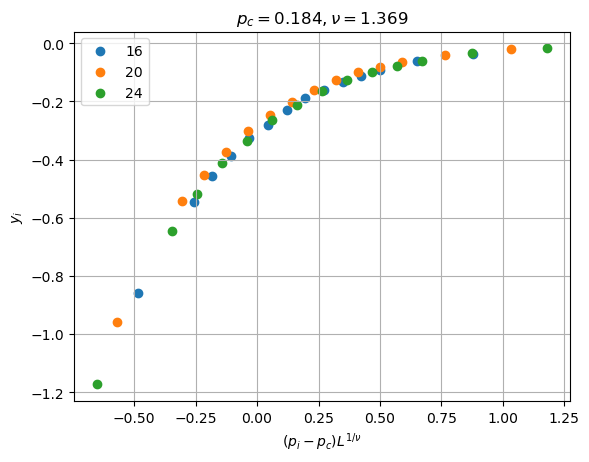

In [94]:
optim.plot_data_collapse()

In [68]:
optim=Optimizer(p_c=0.48,nu=1.,df=df_0_1,params={'Metrics':'EE',},Lmin=16,p_range=[-0.00,0.07])

In [69]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 5.18287208329591
              x: [ 5.125e-01  2.000e+00]
            nit: 36
           nfev: 69
  final_simplex: (array([[ 5.125e-01,  2.000e+00],
                        [ 5.124e-01,  2.000e+00],
                        [ 5.125e-01,  2.000e+00]]), array([ 5.183e+00,  5.183e+00,  5.183e+00])),
 0.6478590104119888,
 tensor([0.0172, 1.2064], dtype=torch.float64))

EE_Scaling_L(16,24)_adder(0-1).png


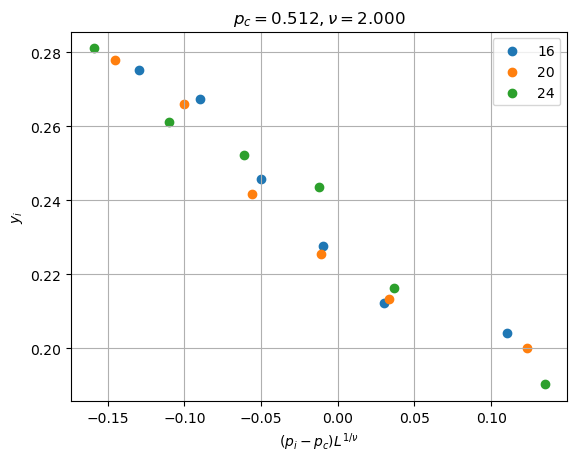

In [70]:
optim.plot_data_collapse()

## +1/3

EE_mean_L(12,24)_adder(1-3).png


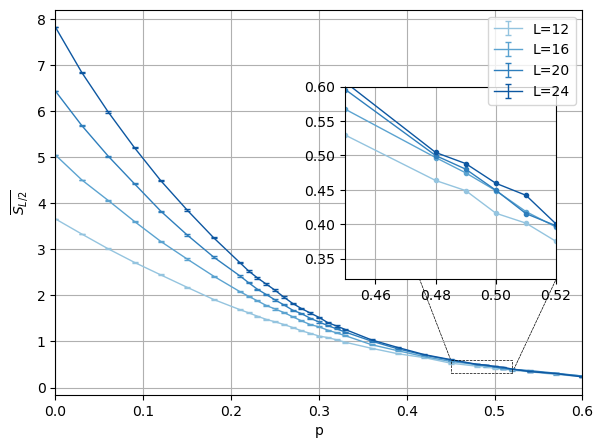

In [63]:
plot_SA_2(df_1_3,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[3.2e-1,6e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(1-3).png


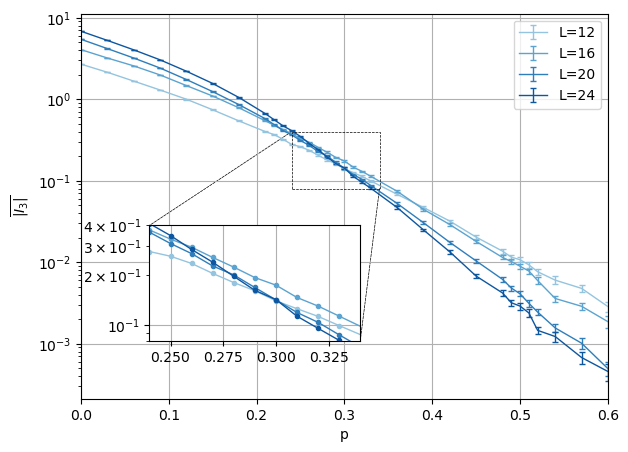

In [64]:
plot_SA_2(df_1_3,L_list=np.arange(12,25,4),inset1=True,xlim1=[.24,.34],ylim1=[.08,.4],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [65]:
optim=Optimizer(p_c=0.25,nu=1.3,df=df_1_3,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [66]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 141.6812259031759
              x: [ 2.533e-01  1.292e+00]
            nit: 29
           nfev: 58
  final_simplex: (array([[ 2.533e-01,  1.292e+00],
                        [ 2.533e-01,  1.292e+00],
                        [ 2.533e-01,  1.292e+00]]), array([ 1.417e+02,  1.417e+02,  1.417e+02])),
 6.589824460612833,
 tensor([0.0011, 0.0268], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-3).png


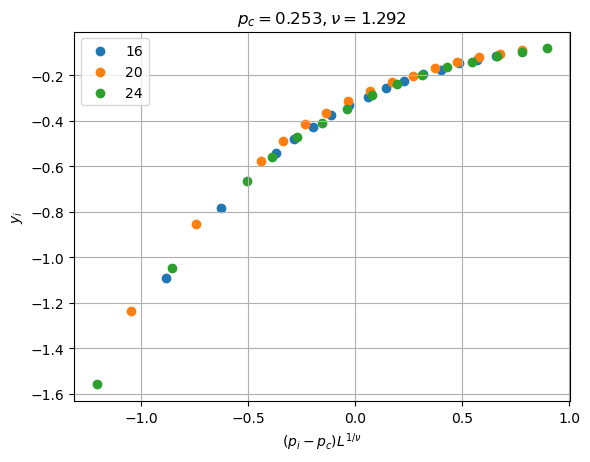

In [67]:
optim.plot_data_collapse()

In [145]:
optim=Optimizer(p_c=0.48,nu=1.,df=df_1_3,params={'Metrics':'EE',},Lmin=16,p_range=[-0.1,0.1])

In [146]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 19.517899749062096
              x: [ 5.019e-01  2.000e+00]
            nit: 30
           nfev: 55
  final_simplex: (array([[ 5.019e-01,  2.000e+00],
                        [ 5.018e-01,  2.000e+00],
                        [ 5.018e-01,  2.000e+00]]), array([ 1.952e+01,  1.952e+01,  1.952e+01])),
 1.3941356963615783,
 tensor([0.0062, 0.1605], dtype=torch.float64))

EE_Scaling_L(16,24)_adder(1-3).png


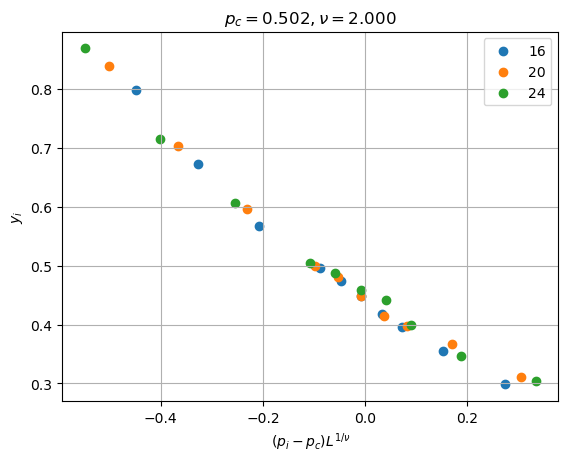

In [147]:
optim.plot_data_collapse()

## +2/3

EE_mean_L(12,24)_adder(2-3).png


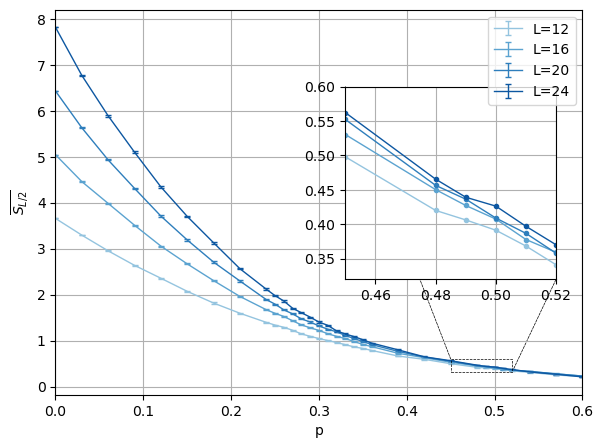

In [71]:
plot_SA_2(df_2_3,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[3.2e-1,6e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(2-3).png


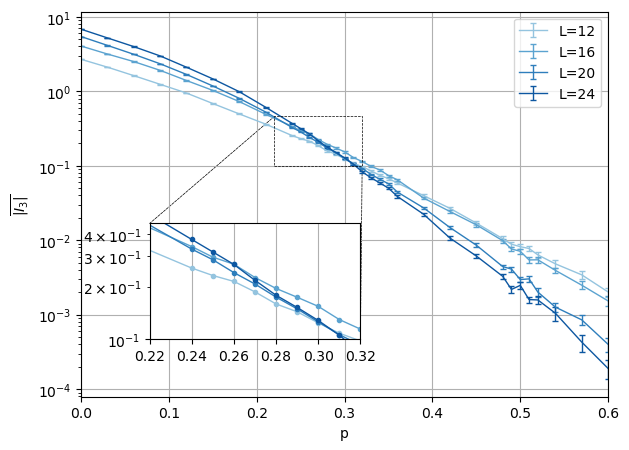

In [72]:
plot_SA_2(df_2_3,L_list=np.arange(12,26,4),inset1=True,xlim1=[.22,.32],ylim1=[.1,.46],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [73]:
optim=Optimizer(p_c=0.23,nu=1.3,df=df_2_3,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [74]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 115.98974698720056
              x: [ 2.558e-01  1.318e+00]
            nit: 51
           nfev: 99
  final_simplex: (array([[ 2.558e-01,  1.318e+00],
                        [ 2.558e-01,  1.318e+00],
                        [ 2.558e-01,  1.318e+00]]), array([ 1.160e+02,  1.160e+02,  1.160e+02])),
 6.269716053362193,
 tensor([0.0012, 0.0272], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(2-3).png


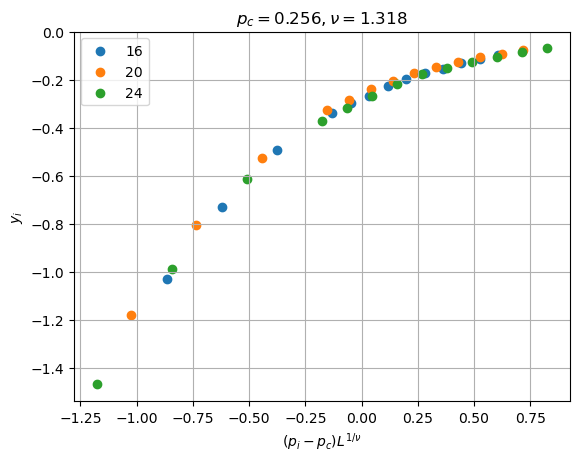

In [75]:
optim.plot_data_collapse()

## +1/2

EE_mean_L(12,24)_adder(1-2).png


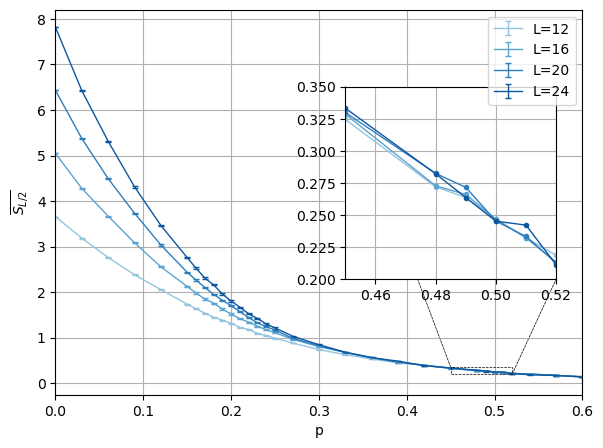

In [78]:
plot_SA_2(df_1_2,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[2.e-1,3.5e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(1-2).png


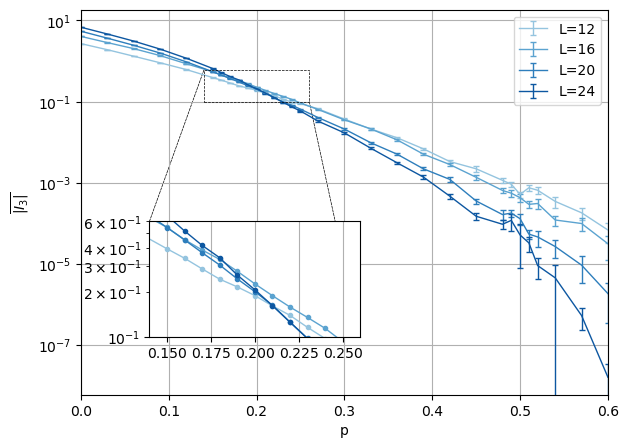

In [79]:
plot_SA_2(df_1_2,L_list=np.arange(12,26,4),inset1=True,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [83]:
optim=Optimizer(p_c=0.18,nu=1.3,df=df_1_2,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [85]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 214.5614851589236
              x: [ 1.795e-01  1.335e+00]
            nit: 26
           nfev: 48
  final_simplex: (array([[ 1.795e-01,  1.335e+00],
                        [ 1.795e-01,  1.335e+00],
                        [ 1.795e-01,  1.335e+00]]), array([ 2.146e+02,  2.146e+02,  2.146e+02])),
 10.72807425794618,
 tensor([0.0010, 0.0275], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-2).png


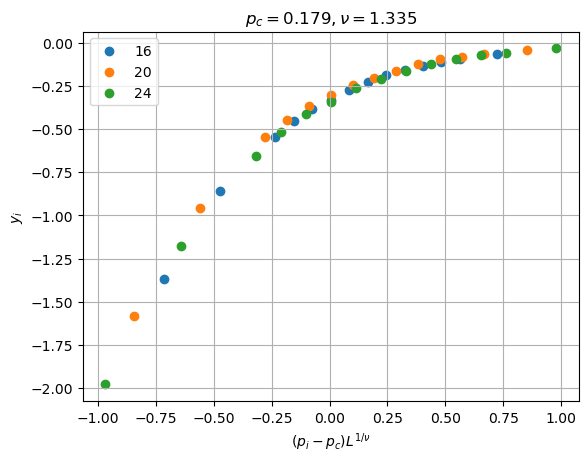

In [86]:
optim.plot_data_collapse()

## No Feedback

EE_mean_L(12,24)_log_adder(1/3,2/3-None).png


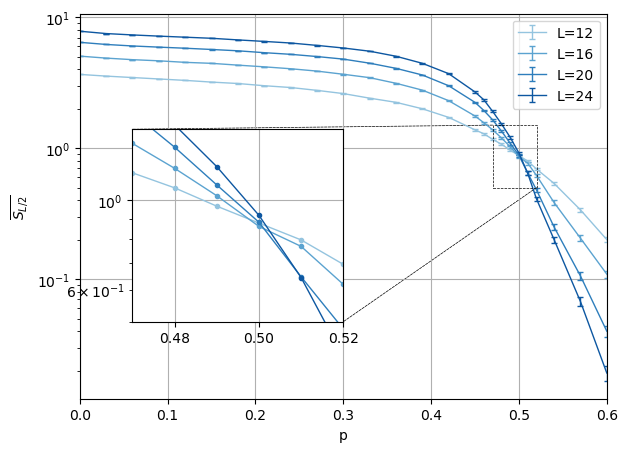

In [22]:
plot_SA_2(df_noFB,L_list=np.arange(12,25,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.47,0.52],ylim2=[0.5,1.5],ax_inset_pos2=[.1,.2,.4,.5],metrics='EE',yscale='log',errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(1/3,2/3-None).png


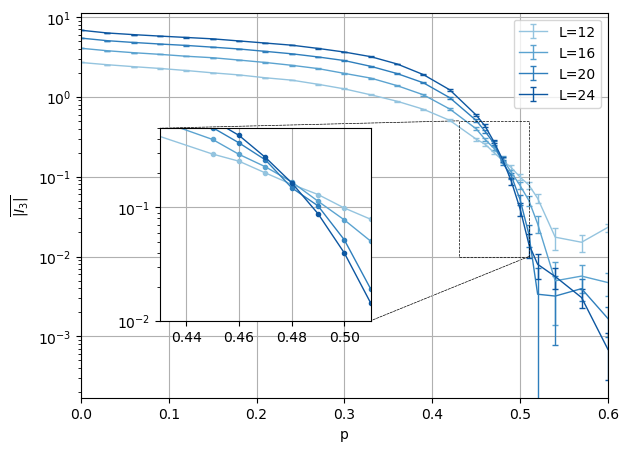

In [78]:
plot_SA_2(df_noFB,L_list=np.arange(12,25,4),inset1=False,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=True,xlim2=[0.43,0.51],ylim2=[0.1e-1,5e-1],ax_inset_pos2=[.15,.2,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [75]:
optim=Optimizer(p_c=0.48,nu=1.5,df=df_noFB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.05,0.01])

In [76]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 1.42829990833722
              x: [ 4.863e-01  9.995e-01]
            nit: 38
           nfev: 70
  final_simplex: (array([[ 4.863e-01,  9.995e-01],
                        [ 4.863e-01,  9.996e-01],
                        [ 4.863e-01,  9.994e-01]]), array([ 1.428e+00,  1.428e+00,  1.428e+00])),
 0.285659981667444,
 tensor([0.0053, 0.2215], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1/3,2/3-None).png


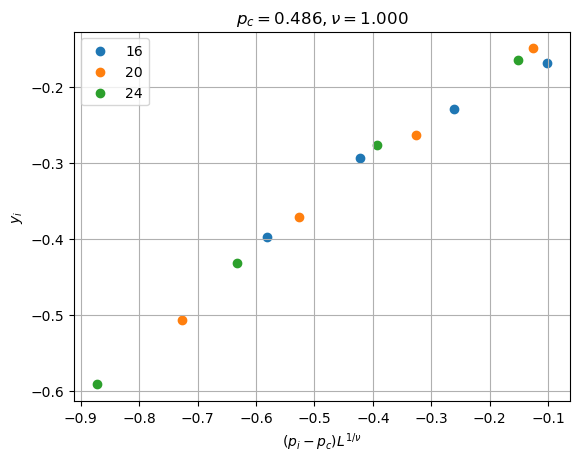

In [77]:
optim.plot_data_collapse()

In [33]:
45109680**2*(128/8)/2**30

30322123.01645279

In [134]:
1/6*2**8

42.666666666666664